<a href="https://colab.research.google.com/github/EdiRamirez/Tablero3/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ejemplo para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.

In [117]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url= "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ["id", "espesor_grupo", "uniformidad_tamaño_celda", "uniformidad_forma_celda",
                "adhesión_marginal", "tamaño_de_célula_epitelial", "núcleos_desnudos",
                "cromatina_suave", "nucléolos_normales", "mitosis", "clase"]
data.head(100)

,id,espesor_grupo,uniformidad_tamaño_celda,uniformidad_forma_celda,adhesión_marginal,tamaño_de_célula_epitelial,núcleos_desnudos,cromatina_suave,nucléolos_normales,mitosis,clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
95,1164066,1,1,1,1,2,1,3,1,1,2
96,1165297,2,1,1,2,2,1,1,1,1,2
97,1165790,5,1,1,1,2,1,3,1,1,2
98,1165926,9,6,9,2,10,6,2,9,10,4


In [118]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(699, 11)

In [119]:
#Cual es el tipo de los atributos?
data.dtypes

id                             int64
espesor_grupo                  int64
uniformidad_tamaño_celda       int64
uniformidad_forma_celda        int64
adhesión_marginal              int64
tamaño_de_célula_epitelial     int64
núcleos_desnudos              object
cromatina_suave                int64
nucléolos_normales             int64
mitosis                        int64
clase                          int64
dtype: object

In [120]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,id,espesor_grupo,uniformidad_tamaño_celda,uniformidad_forma_celda,adhesión_marginal,tamaño_de_célula_epitelial,cromatina_suave,nucléolos_normales,mitosis,clase
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


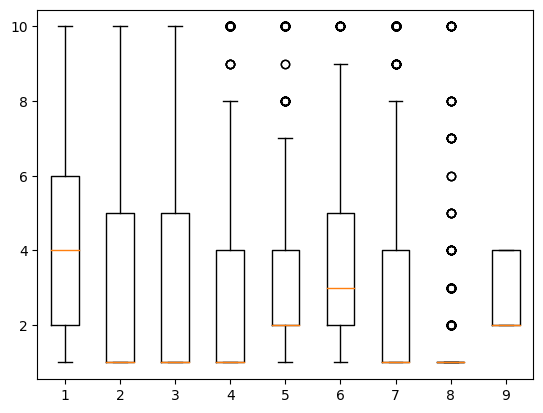

In [121]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['espesor_grupo'],data['uniformidad_tamaño_celda'],data['uniformidad_forma_celda'],data['adhesión_marginal'],data['tamaño_de_célula_epitelial'], data['cromatina_suave'], data['nucléolos_normales'], data['mitosis'], data['clase']))
plt.show()

In [122]:
#Medida de centralidad para atributos categóricos:
data.mode()

,id,espesor_grupo,uniformidad_tamaño_celda,uniformidad_forma_celda,adhesión_marginal,tamaño_de_célula_epitelial,núcleos_desnudos,cromatina_suave,nucléolos_normales,mitosis,clase
0,1182404,1,1,1,1,2,1,2,1,1,2


In [123]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
data.corr()

<ipython-input-123-364188702e2a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,espesor_grupo,uniformidad_tamaño_celda,uniformidad_forma_celda,adhesión_marginal,tamaño_de_célula_epitelial,cromatina_suave,nucléolos_normales,mitosis,clase
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
espesor_grupo,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniformidad_tamaño_celda,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniformidad_forma_celda,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
adhesión_marginal,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
tamaño_de_célula_epitelial,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
cromatina_suave,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
nucléolos_normales,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitosis,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
clase,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [124]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

0

In [125]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

id                            0
espesor_grupo                 0
uniformidad_tamaño_celda      0
uniformidad_forma_celda       0
adhesión_marginal             0
tamaño_de_célula_epitelial    0
núcleos_desnudos              0
cromatina_suave               0
nucléolos_normales            0
mitosis                       0
clase                         0
dtype: int64

In [126]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['clase'].value_counts())

2    458
4    241
Name: clase, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.

In [127]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['núcleos_desnudos'] = labelencoder.fit_transform(data['núcleos_desnudos'])
data.head()

,id,espesor_grupo,uniformidad_tamaño_celda,uniformidad_forma_celda,adhesión_marginal,tamaño_de_célula_epitelial,núcleos_desnudos,cromatina_suave,nucléolos_normales,mitosis,clase
0,1000025,5,1,1,1,2,0,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,0,3,1,1,2


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [128]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('clase')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

id  espesor_grupo  uniformidad_tamaño_celda  \
clase                                                         
2     0    1320304              3                         1   
      1    1198641              3                         1   
      2    1257815              5                         1   
      3    1334667              1                         1   
      4    1296263              4                         1   
...            ...            ...                       ...   
4     236  1299596              6                         6   
      237  1099510             10                         4   
      238   672113              7                         5   
      239  1110524             10                         5   
      240   492268             10                         4   

           uniformidad_forma_celda  adhesión_marginal  \
clase                                                   
2     0                          2                  2   
      1                          1                  1   
      2                          3                  1   
      3                          1                  1   
      4                          1                  1   
...                            ...                ...   
4     236                        6                  5   
      237                        3                  1   
      238                        6                 10   
      239                        5                  6   
      240                        6                  1   

           tamaño_de_célula_epitelial  núcleos_desnudos  cromatina_suave  \
clase                                                                      
2     0                             2                 0                1   
      1                             2                 0                3   
      2                             2                 0                2   
      3                             2                 0                1   
      4                             2                 0                1   
...                               ...               ...              ...   
4     236                           4                 1                7   
      237                           3                 3                6   
      238                           4                 1                5   
      239                           8                 8                7   
      240                           2                 1                5   

           nucléolos_normales  mitosis  clase  
clase                                          
2     0                     1        1      2  
      1                     1        1      2  
      2                     1        1      2  
      3                     1        1      2  
      4                     1        1      2  
...                       ...      ...    ...  
4     236                   6        2      4  
      237                   5        2      4  
      238                   3        1      4  
      239                   1        1      4  
      240                   3        1      4  

[482 rows x 11 columns]

In [129]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['clase'].value_counts())

2    241
4    241
Name: clase, dtype: int64


In [143]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('clase', axis=1), dataBal.clase, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(337, 10) (337,)
(145, 10) (145,)


In [144]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [145]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2,
       2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [146]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9517241379310345